# Firearm Data

First, I imported pandas and loaded the data from the csv file and checked to make sure that it imported correctly.

In [2]:
#read the csv file and check it
import pandas as pd
firearms = pd.read_csv("gun_data.csv")
firearms.head()

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


<br/>
I turned the csv file into a dictionary where the keys were the neighborhoods, and the values were the amount of times a neighborhood showed up by iterating over the Incident Neighborhood column.

In [3]:
#count how many times each neighborhood appears using a dictionary
guns = dict()

for index, row in firearms.iterrows():
    item = row['neighborhood']
    
    if item not in guns:
        guns[item] = 1
    else:
        guns[item] = guns[item] + 1
        
print(guns)

{'Mount Oliver Borough': 7, 'Sheraden': 108, 'Terrace Village': 40, 'Brighton Heights': 82, nan: 781, 'Westwood': 10, 'East Liberty': 74, 'Upper Lawrenceville': 11, 'Marshall-Shadeland': 108, 'Beechview': 65, 'East Hills': 109, 'Arlington': 28, 'Arlington Heights': 8, 'Mount Washington': 78, 'South Side Flats': 180, 'Hazelwood': 112, 'Homewood South': 252, 'Greenfield': 22, 'Bloomfield': 38, 'Beltzhoover': 43, 'Homewood North': 130, 'Upper Hill': 28, 'Perry South': 112, 'Lincoln-Lemington-Belmar': 103, 'Bedford Dwellings': 69, 'Homewood West': 53, 'Carrick': 117, 'Central Northside': 59, 'Chateau': 22, 'Fineview': 62, 'Chartiers City': 4, 'Larimer': 107, 'Polish Hill': 10, 'South Shore': 12, 'Highland Park': 31, 'Knoxville': 96, 'Lower Lawrenceville': 13, 'Allentown': 67, 'Spring Hill-City View': 65, 'Garfield': 80, 'Bluff': 50, 'Overbrook': 25, 'South Side Slopes': 37, 'Central Business District': 112, 'Banksville': 10, 'Perry North': 33, 'Friendship': 3, 'Crawford-Roberts': 50, 'Midd

<br/>
This data is unsorted, so I wanted to turn the dictionary into something that would be easier to manipulate. I turned the dictionary into a data frame.

In [5]:
#Turn dictionary into a data frame
data = {
    "Neighborhood": guns.keys(),
    "Firearms": guns.values()
}
gn = pd.DataFrame(data)

print(gn) 

            Neighborhood  Firearms
0   Mount Oliver Borough         7
1               Sheraden       108
2        Terrace Village        40
3       Brighton Heights        82
4                    NaN       781
..                   ...       ...
84            Mt. Oliver         4
85              West End         6
86                Esplen         9
87                  Hays         7
88        Swisshelm Park         1

[89 rows x 2 columns]


<br/>
To find out the neighborhood with the least amount of arrests, I need to sort the data, so I sorted the data frame by the number of arrests.

In [6]:
#Sort values
gn = gn.sort_values(by="Firearms")
print(gn)

        Neighborhood  Firearms
88    Swisshelm Park         1
64       Summer Hill         2
46        Friendship         3
76     Regent Square         4
79           Oakwood         4
..               ...       ...
26           Carrick       117
20    Homewood North       130
14  South Side Flats       180
16    Homewood South       252
4                NaN       781

[89 rows x 2 columns]


<br/>
Now, I would like to visualize the data with a (bad) bar graph.

<Axes: >

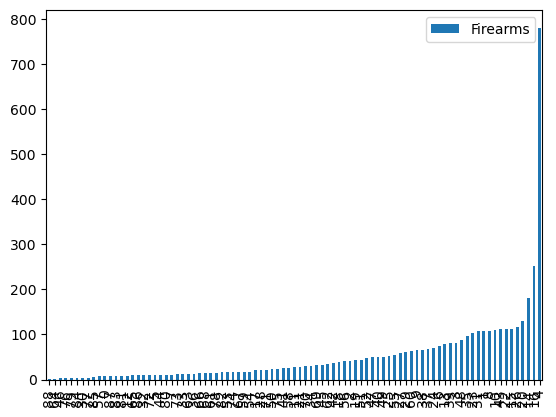

In [7]:
#plot data
gn.plot.bar()

<br/>
That is unreadable, but I don't need to know the arrests for every neighborhood. That is why we sorted the data, so I am only going to look at the 10 neighborhoods with the least amount of arrests.

<Axes: xlabel='Neighborhood', ylabel='Number of Firearm Seizures'>

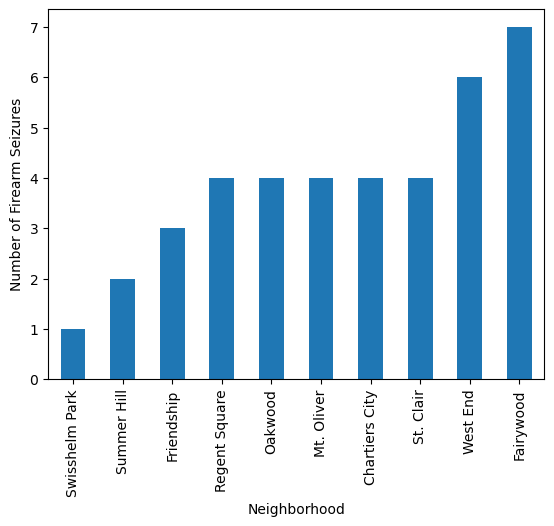

In [9]:
#plot better
gn[:10].plot.bar(x="Neighborhood", y="Firearms", ylabel="Number of Firearm Seizures", legend=False)